In [1]:
# delete 'block_id' == -1 （即touch_type 为ST_abandon 和 NC_abandon）的数据
""" 
cleans the tactile dataset by removing rows where block_id == -1
(where touch_type is either ST_abandon or NC_abandon). 
The cleaned dataset is saved to 3_labeled_tactile_dataset_clean.csv. 
"""
import os
import pandas as pd


out_path =  "../DATA/"
data = pd.read_csv("../DATA/2_labeled_tactile_dataset.csv")

clean_data = data[data['block_id']!= -1].copy()

output_path = os.path.join(out_path, "3_labeled_tactile_dataset_clean.csv")
        
if os.path.exists(output_path):
    os.remove(output_path)
        
clean_data.to_csv(output_path, index=False)

print(f"3_labeled_tactile_dataset_clean.csv 文件已生成在{output_path}")

3_labeled_tactile_dataset_clean.csv 文件已生成在../DATA/3_labeled_tactile_dataset_clean.csv


In [3]:
# 验证
df = pd.read_csv("../DATA/3_labeled_tactile_dataset_clean.csv")
print(dt.groupby('touch_type')['block_id'].nunique())
df.head()

touch_type
DT    150
G      75
NC      1
P      76
ST    150
Name: block_id, dtype: int64


,index,time,tau_J0,tau_J1,tau_J2,tau_J3,tau_J4,tau_J5,tau_J6,tau_J_d0,...,etau_J0,etau_J1,etau_J2,etau_J3,etau_J4,etau_J5,etau_J6,label,block_id,touch_type
0,1.0,0.000000,-0.264001,-33.375355,-1.669200,19.232248,0.428794,2.457165,-0.059643,0.0,...,0.264001,33.375355,1.669200,-19.232248,-0.428794,-2.457165,0.059643,0.0,-2.0,NC
1,2.0,0.005002,-0.264001,-33.375355,-1.704905,19.307627,0.437950,2.468151,-0.089855,0.0,...,0.264001,33.375355,1.704905,-19.307627,-0.437950,-2.468151,0.089855,0.0,-2.0,NC
2,3.0,0.009990,-0.264001,-33.375355,-1.704905,19.307627,0.437950,2.468151,-0.089855,0.0,...,0.264001,33.375355,1.704905,-19.307627,-0.437950,-2.468151,0.089855,0.0,-2.0,NC
3,4.0,0.014991,-0.224328,-33.450733,-1.669200,19.307627,0.437950,2.468151,-0.018444,0.0,...,0.224328,33.450733,1.669200,-19.307627,-0.437950,-2.468151,0.018444,0.0,-2.0,NC
4,5.0,0.020008,-0.224328,-33.450733,-1.669200,19.307627,0.437950,2.468151,-0.018444,0.0,...,0.224328,33.450733,1.669200,-19.307627,-0.437950,-2.468151,0.018444,0.0,-2.0,NC


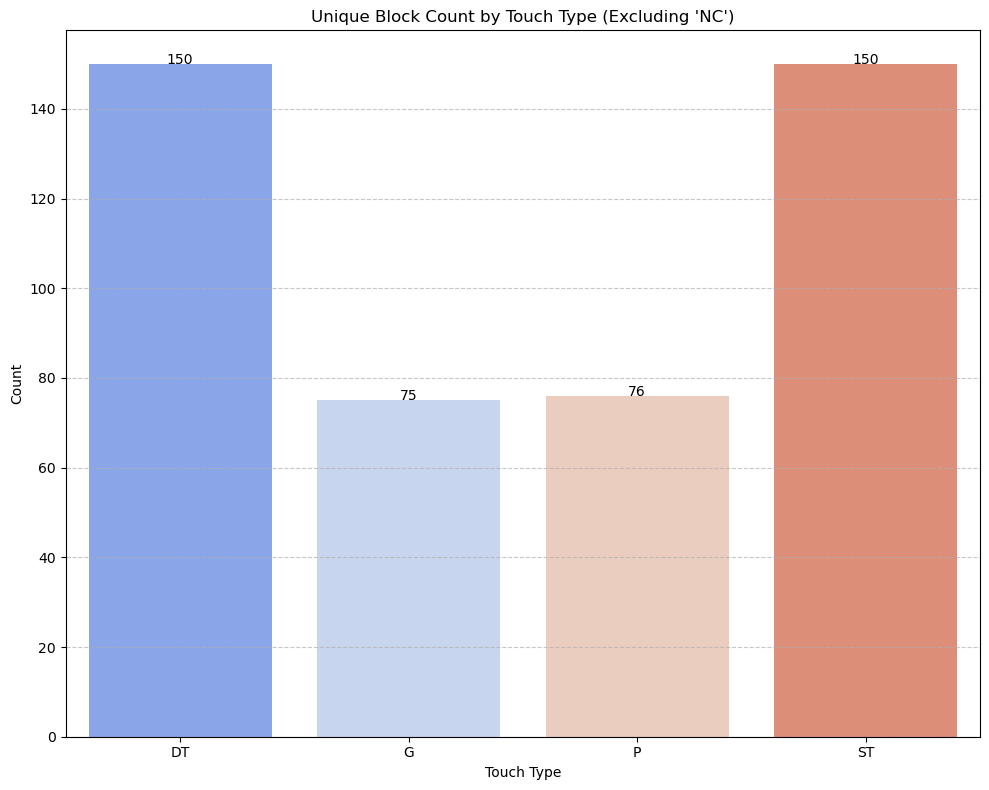

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out data where touch_type is "NC"
filtered_df = df[df['touch_type'] != 'NC']

# Count unique block_ids for each touch_type
unique_block_counts = filtered_df.groupby('touch_type')['block_id'].nunique()

# Set up the plot
plt.figure(figsize=(10, 8))
sns.barplot(
    x=unique_block_counts.index, 
    y=unique_block_counts.values, 
    palette="coolwarm"
)

# Add titles and axis labels
plt.title("Unique Block Count by Touch Type (Excluding 'NC')")
plt.xlabel("Touch Type")
plt.ylabel("Count",)
plt.xticks(fontsize=10)

# Add value annotations above the bars
for i, value in enumerate(unique_block_counts.values):
    plt.text(i, value , f"{value}", ha='center', color="black")

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
